# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [176]:
#Import all the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt 

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [177]:
#Reading the dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data" , names=names)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [178]:
#Taking the head with 10 rows
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [179]:
#Printing the datatypes using .info()
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [180]:
#Getting the shape of the dataset
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [181]:
#Looking at the number of zeros in each column
for feature in pima_df.columns:
    print('There are {} entries where {} is zero'.format(pima_df[pima_df[feature] == 0].shape[0], feature))

There are 111 entries where preg is zero
There are 5 entries where plas is zero
There are 35 entries where pres is zero
There are 227 entries where skin is zero
There are 374 entries where test is zero
There are 11 entries where mass is zero
There are 0 entries where pedi is zero
There are 0 entries where age is zero
There are 500 entries where class is zero


In [182]:
#Assuming that only pregnancy and class can have zeros
#Creating a loop to convert zeros to Nulls in other columns
for feature in pima_df.iloc[:,1:(pima_df.shape[1]-1)].columns:
    pima_df[feature].replace({0: None}, inplace = True)

In [183]:
#Replacing the nulls with the median for that column
for feature in pima_df.columns:
    pima_df[feature].fillna(value = pima_df[feature].median(), inplace = True)

In [184]:
#Looking at the number of zeros in each column again
for feature in pima_df.columns:
    print('There are {} entries where {} is zero'.format(pima_df[pima_df[feature] == 0].shape[0], feature))

There are 111 entries where preg is zero
There are 0 entries where plas is zero
There are 0 entries where pres is zero
There are 0 entries where skin is zero
There are 0 entries where test is zero
There are 0 entries where mass is zero
There are 0 entries where pedi is zero
There are 0 entries where age is zero
There are 500 entries where class is zero


We have sucessfully replaced zeros with the median in each column except pregnancy and class

# Q5 Print the descriptive statistics of each & every column using describe() function

In [185]:
#Getting the summary using describe
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [186]:
#Using the value_counts to see the distribution of the class variable
pima_df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

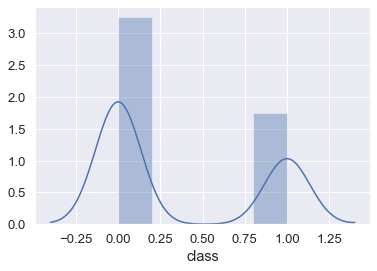

In [187]:
#Using the distplot in seaborn to plot the distribution for the same
sns.distplot(pima_df['class'])

**Insight: The class column seems to have a greater number of zeros than ones.**

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [188]:
#Lets take No. of pregnancies and Glucose (Plasma)
pima_df[['preg', 'plas']].describe()

,preg,plas
count,768.000000,768.000000
mean,3.845052,121.656250
std,3.369578,30.438286
min,0.000000,44.000000
25%,1.000000,99.750000
50%,3.000000,117.000000
75%,6.000000,140.250000
max,17.000000,199.000000


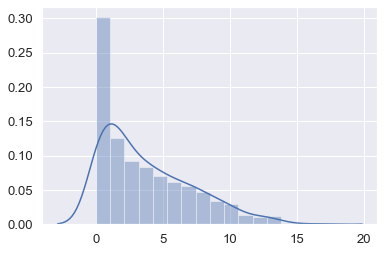

In [189]:
#Plotting distplot for pregnancies
sns.distplot(pima_df[['preg']])

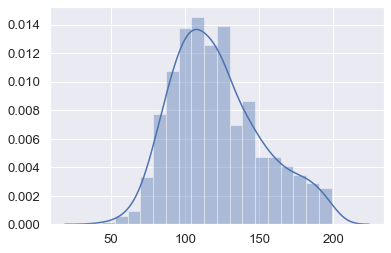

In [190]:
#Plotting distplot for Glucose
sns.distplot(pima_df[['plas']])

**Insight 1: Based on the mean and median we can see that Glucose is almost normally distributed whereas Pregnancies is left skewed.**  
**Insight 2: Plasma does not have a significant tail, but the pregnancy attribute has a significant right tail** 

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\varun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\varun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


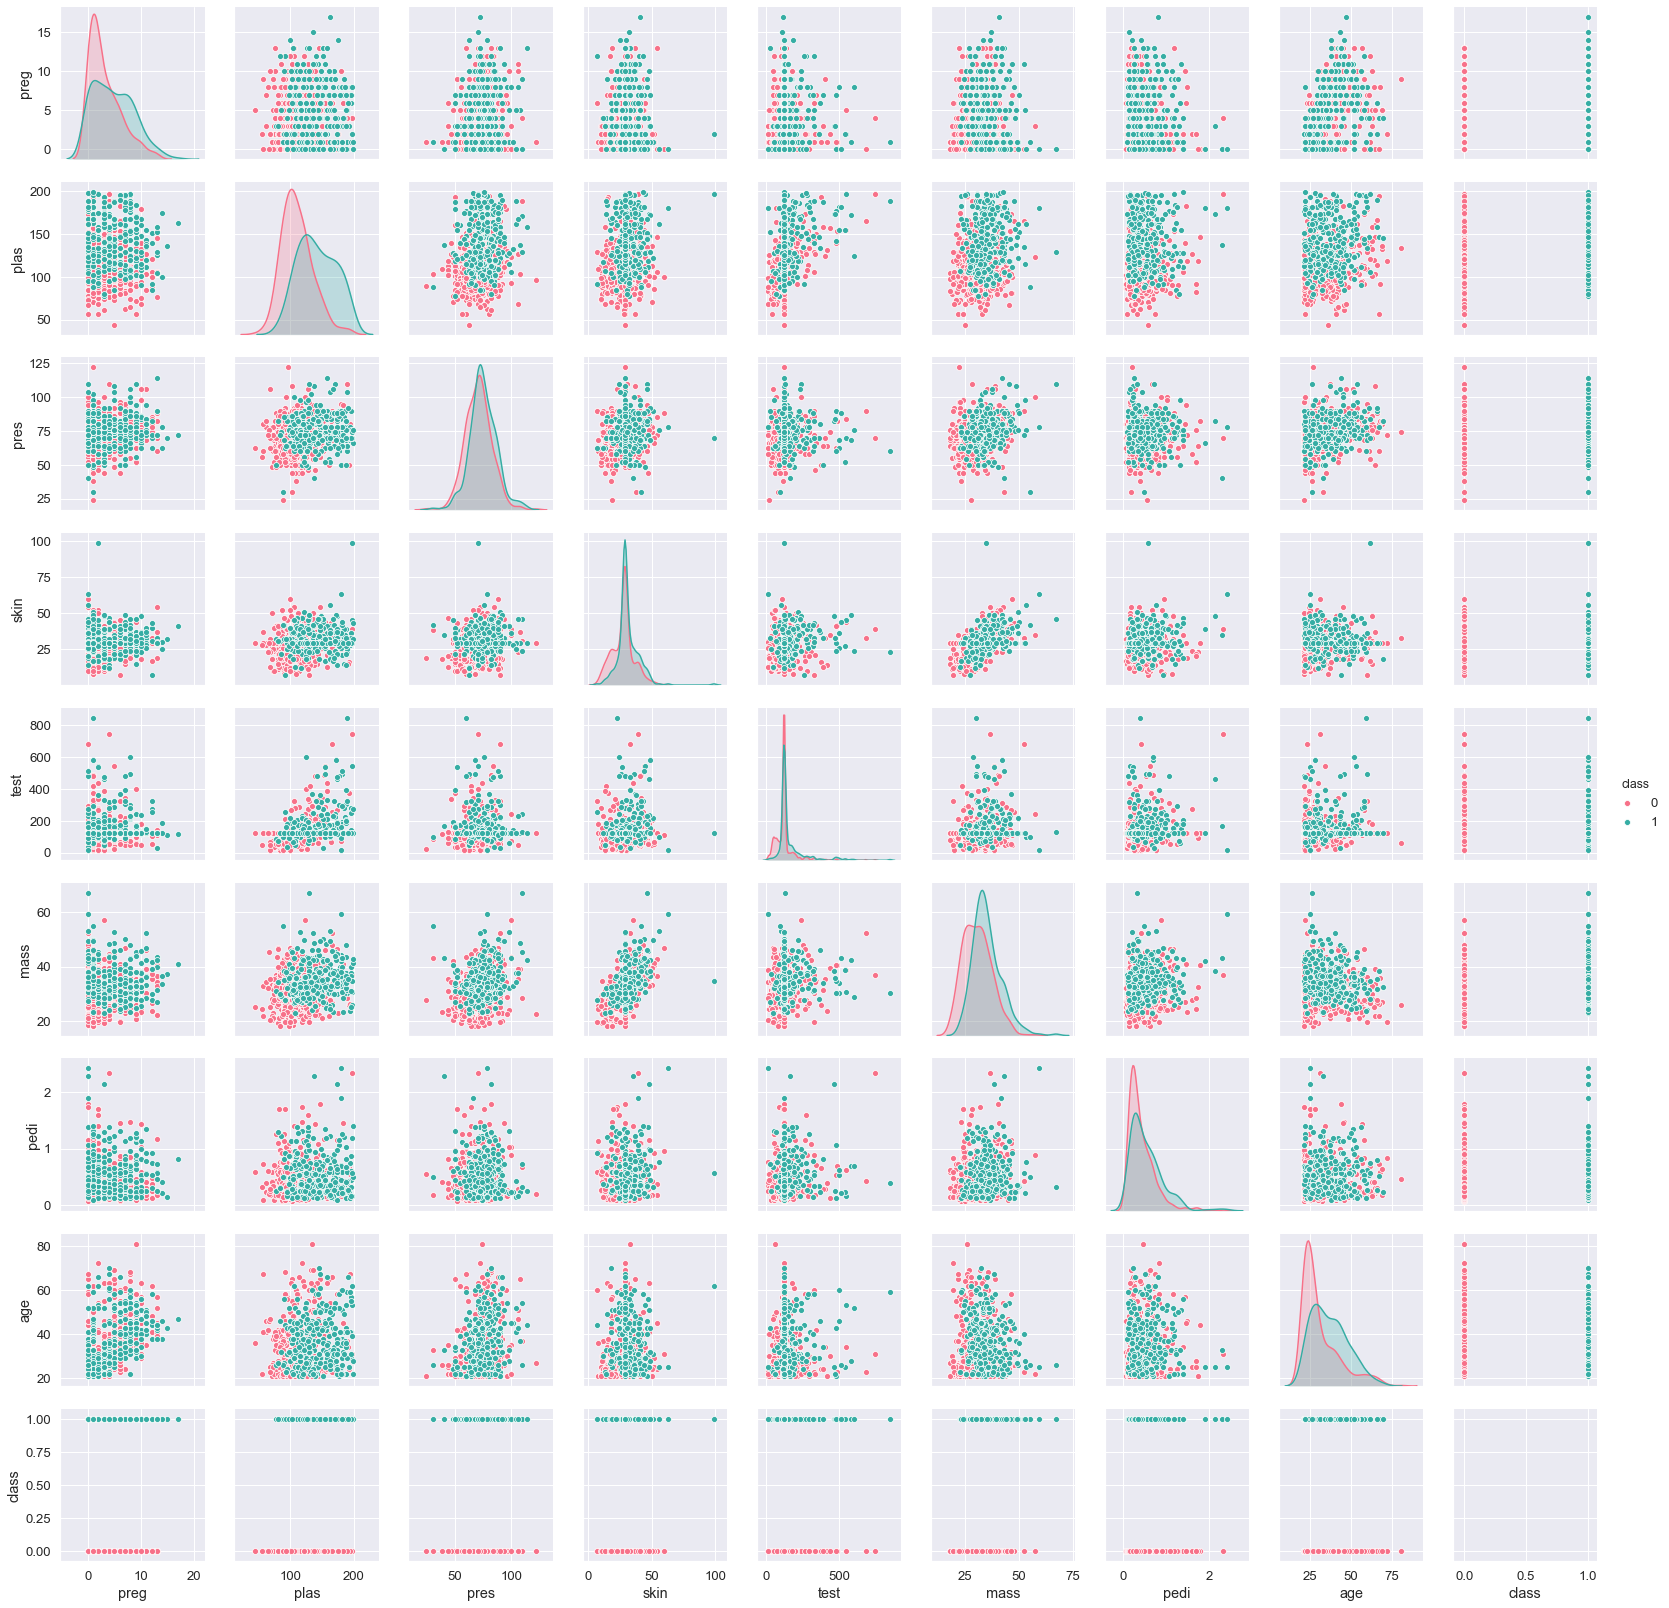

In [191]:
#Plotting pair plot for all variables
sns.pairplot(pima_df, palette="husl", hue="class")

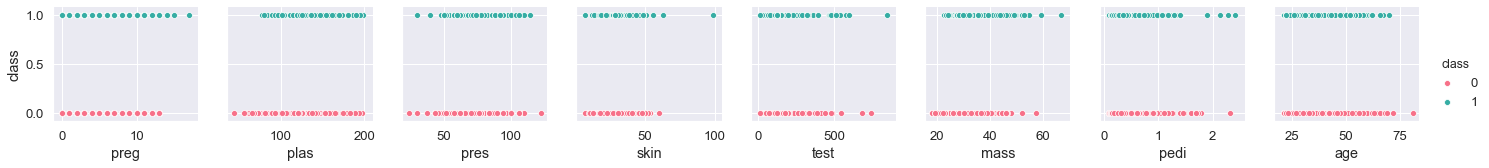

In [192]:
#Plotting only between the target and independent variables
sns.pairplot(pima_df, x_vars = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'],
             y_vars = ['class'], palette="husl", hue = 'class')

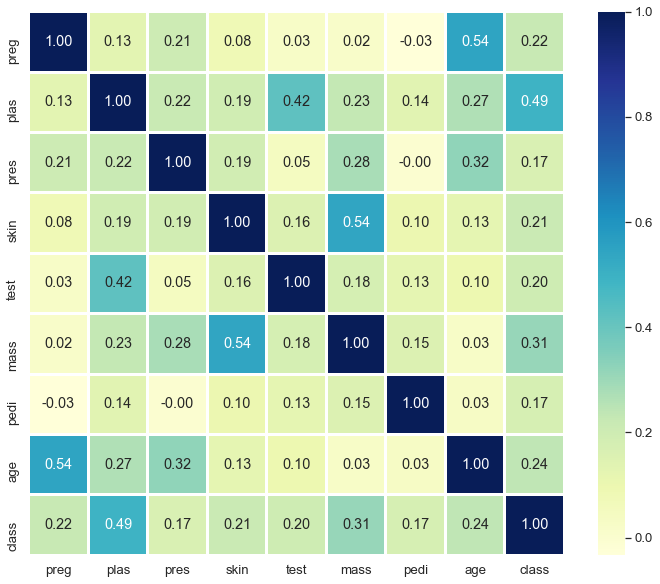

In [193]:
#Plotting the correlation matrix using sns.heatmap()
plt.figure(figsize = (12,10))
sns.set(font_scale=1.2)
sns.heatmap(pima_df.corr(),annot = True, fmt = '.2f', cmap="YlGnBu",
             linecolor='white', linewidths= '2', cbar = True )

Using the plot - infer the relationship between different variables

### Insights:
1. Glucose and the Class has the highest correlation of 0.49
2. Other variables tend to be weakly correlated
3. Mass and skin seem to be slightly correlated (0.54)
4. Pregnancies and age also seem to be slightly correlated (0.54)  
  
**None of the individual features seem to have a high correlation with our target class!**

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [194]:
#Separating the target variable from the features
X = pima_df
y = X.pop('class')

In [195]:
#Normalizing the Feature set using zscores
X = X.apply(zscore)

In [196]:
#Importing the train-test split library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [197]:
print('The shape of the training set: ',X_train.shape)
print('The shape of the testing set: ',X_test.shape)

The shape of the training set:  (537, 8)
The shape of the testing set:  (231, 8)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [198]:
#Creating the decision tree classifier object
my_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_leaf = 50, min_samples_split = 50)

In [199]:
#Fitting the decision tree to the data
my_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [200]:
y_pred_dt = my_dt.predict(X_test)

Decison tree accuracy on testing set = 0.81 


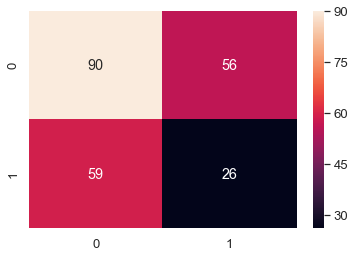

In [201]:
#Loading the metrics library
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

#Printing the accuracy
print('Decison tree accuracy on testing set = %.2f '%accuracy_score(y_test, y_pred_dt))

#Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = '.0f')

Print the feature importance of the decision model - Optional

In [202]:
#Printing the classification report
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       146
           1       0.73      0.79      0.76        85

    accuracy                           0.81       231
   macro avg       0.80      0.81      0.80       231
weighted avg       0.82      0.81      0.82       231



In [203]:
#Printing the feature importances
print (pd.DataFrame(my_dt.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
preg  0.000000
plas  0.536853
pres  0.000000
skin  0.000000
test  0.000000
mass  0.338271
pedi  0.000000
age   0.124877


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [204]:
#Importing the Random Forest Library
from sklearn.ensemble import RandomForestClassifier

#Creating the random forest object
my_rf = RandomForestClassifier(criterion='entropy',max_depth=5, n_estimators=35)
my_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [205]:
#Predicting on the test set
y_pred_rf = my_rf.predict(X_test)

In [206]:
#Getting the Random forest accuracy
print('Random forest test accuracy = %.2f'%accuracy_score(y_test, y_pred_rf))

#Printing the classification report
print(metrics.classification_report(y_test,y_pred_ab))

Random forest test accuracy = 0.76
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       146
           1       0.35      0.33      0.34        85

    accuracy                           0.53       231
   macro avg       0.49      0.49      0.49       231
weighted avg       0.52      0.53      0.52       231



# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [207]:
#Importing the AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

#Creating the model object
my_ab = AdaBoostClassifier(n_estimators=41)

#Fittng the model
my_ab = my_ab.fit(X_train, y_train)

#Predicting on the test set
y_pred_ab = my_ab.predict(X_test)

In [208]:
#Accuracy of my AdaBoost Algorithm
print('Adaboost test accuracy = %.2f'%accuracy_score(y_test, y_pred_ab))

#Printing the classification report
print(metrics.classification_report(y_test,y_pred_ab))

Adaboost test accuracy = 0.80
              precision    recall  f1-score   support

           0       0.82      0.88      0.84       146
           1       0.76      0.66      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [209]:
#Importing the Bagging Classifier Algorithm
from sklearn.ensemble import BaggingClassifier

#Creating my Bagging Classifier Object
#Running it for the decision tree model created earlier
my_bg = BaggingClassifier(base_estimator=my_dt, n_estimators=41, max_samples=0.7, random_state= 1)

#Fitting the Model
my_bg = my_bg.fit(X_train, y_train)

#Predicting on the test set
y_pred_bg = my_bg.predict(X_test)

In [210]:
#Accuracy of my Bagging Classifier Algorithm
print('Bagging Classifier test accuracy = %.2f'%accuracy_score(y_test, y_pred_bg))

#Printing the classification report
print(metrics.classification_report(y_test,y_pred_bg))

Bagging Classifier test accuracy = 0.77
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       146
           1       0.73      0.58      0.64        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [211]:
#Importing the Gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
#Creating my model object
my_gb = GradientBoostingClassifier()
#Fitting the model
my_gb = my_gb.fit(X_train, y_train)
#Predicting on the test set
y_pred_gb = my_gb.predict(X_test)

In [212]:
#Accuracy of my Gradient Boost Algorithm
print('Gradient Boost Classifier test accuracy = %.2f'%accuracy_score(y_test, y_pred_gb))

#Printing the classification report
print(metrics.classification_report(y_test,y_pred_gb))

Gradient Boost Classifier test accuracy = 0.81
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       146
           1       0.77      0.68      0.72        85

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231



# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [213]:
#Importing the voting classifier
from sklearn.ensemble import VotingClassifier

#Creating the Voting Classifier Object
eclf1 = VotingClassifier(estimators=[('dt', my_dt), ('rf', my_rf), ('ab', my_ab), ('bc', my_bg), ('gb', my_gb)], voting='hard')

#Fitting on the model on the training set
eclf1.fit(X_train, y_train)

#Predicting the values on the test set
y_pred_vc = eclf1.predict(X_test)

#Getting the Accuracy
print('Accuracy of my voting classifier on test = %.2f'%accuracy_score(y_test, y_pred_vc))
print('Accuracy of my voting classifier on train = %.2f'%accuracy_score(y_train, eclf1.predict(X_train)))

Accuracy of my voting classifier on test = 0.80
Accuracy of my voting classifier on train = 0.84
